Steps:
1>Make a list of DMS or lat long coordinates for stations to be considered for measuring gravity field at the central station(LatLongSing.txt).<br>
2>Transform to X,Y,Z coordinate system (Singapore.txt)<br>
3>Compute angular separation between stations (AngDistBtwnStns.ipynb)<br>
4>Install LoadDef(https://github.com/hrmartens/LoadDef): The gravity load green function are obtained from the load and potential love numbers generated from the python based software LoadDef created by Prof. Hilary Martens. The love numbers are based on the PREM model. T
The convolution integral given in eq. 1  in the paper 
https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2002JB002050.
    #Install Anaconda
    1>mkdir ananconda3
    2>cd ananconda3/
    3>curl -O https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
    4>sha256sum Ananconda3-2019.10-Linux-x86_64.sh
    5>bash Anaconda3-2019.10-Linux-x86_64.sh
    6>source activate
    7>source ~/.bashrc
    Steps for installing load def
    8>conda config --prepend channels conda-forge
    9>conda config --set channel_priority strict
    10>conda create -n LDEF python=3.7 basemap mpi4py scipy netCDF4 pyshp shapely
    #Installing git and cloning loaddef
    11>sudo apt install git
    12>git clone https://github.com/hrmartens/LoadDef.git
    13>conda activate LDEF
    14>mpirun -np 1 python LoadDef/working/run_ln.py (generates love numbers) 
    Before 14 in the file /home/user/LoadDef/LOADGF/LN/comput_love_numbers.py you can change the variable num=100 (i.e, the no. of love numbers)
5>In the file      /home/user/LoadDef/LOADGF/GF/compute_green_functions.py you should place within theta the angular separations.<br>
6>mpirun -np 1 python LoadDef/working/run_gf.py<br>
7>Take the file from /home/user/LoadDef/output/Greens_Functions/ce_PREM.txt and place the file in the working directory where gravityTimeSeries is placed.<br>
8>Submit the job Singapore.txt in the link http://massloading.net/ondemand_form.html, set the tidal model to TOC:FES2012 and the mode to harmonics.<br>
9>Download cm_loading_toc_fes2012_harmod.hps file in working directory from the link generated from http://massloading.net/ondemand_form.html<br>
10>From cm_loading_toc_fes2012_harmod.hps extract harmonic dictionary tabulated in into a file HarmonicDict.txt
#### Harmonic   Phase          Frequency           Acceleration<br>
11>From cm_loading_toc_fes2012_harmod.hps extract harmnonics  tabulated under
####  Wave ID   Site ID     Up-cos  East-cos North-cos   Up-sin  East-sin North-sin<br>
at various stations ATOM0,ATOM1 tabulated  into  files ATOM0_tidalDisp.txt,ATOM1_tidalDisp.txt etc.<br>


In [1]:
import numpy as np
#This files contains tidal data Harmonics obtained for the period 1st January 2020 to 1st Febraury 2020 
#f=open("/content/drive/MyDrive/gravityTimeSeries/harmonic_dict.txt","+r").readlines()
f=open("harmonic_dict.txt","+r").readlines()

In [2]:
harArr=[f[2:][j].split()[2:] for j in range(len(f[2:]))]

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
harArr=np.asarray([np.asarray([float(elem.replace('D','E')) for elem in line]) for line in harArr])

In [5]:
harArr.shape

(44, 3)

In [6]:
timeStart=1599639307# time elapsed from epoch in secs date-1st January 2020 epoch-1st January 2000
timeStop=timeStart+24*60*60*30*3# time elapsed from epoch in secs 1st February 2020
intvl=int((timeStop-timeStart)/60)
t=np.linspace(timeStart,timeStop,intvl)

In [7]:
len(t)

129600

In [8]:
tidalDispTimeSer=np.zeros([17,len(t)])

In [9]:
tidalDispTimeSer[0].shape

(129600,)

The files ATOM0_tidalDisp.txt,ATOM1_tidalDisp.txt contain the cosine and sine tidal height amplitude data along up, east and north directions. While the harmonic_dict.txt data helps in determining the phases of the various harmonics. The cosine and sine of the harmonics are multiplied with the associated amplitudes and the sequence is summed over the harmonics listed in the dictionary. All this data files BERKn_tidalDisp.txt and harmonic_dict.txt has been extracted from the harpos file "ce_loading_toc_fes2012_harmod.hps". The tidal displacement height data is obtained for 16 different locations neighbouring the SanFrancisco
location.

In [10]:
#g=open("/content/drive/MyDrive/gravityTimeSeries/ATOM%s_tidalDisp.txt"%(14)).readlines() # These files will not be used
#g=open("ATOM%s_tidalDisp.txt"%(14)).readlines() # These files will not be used
#AmpArr=np.asarray([np.asarray([float(elem) for elem in line.split()[3:]]) for line in g[2:]]) # These files will not be used
#print(harArr.shape) # This line will not be used
#np.asarray([np.sum(AmpArr[:,0]*np.cos(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)+AmpArr[:,3]*np.sin(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)) for time in t])
for i in range(17):
    print(i)
    g=open("ATOM%s_tidalDisp.txt"%(i)).readlines()
    AmpArr=np.asarray([np.asarray([float(elem) for elem in line.split()[3:]]) for line in g[2:]])
    print(AmpArr.shape)
    tidalDispTimeSer[i]=np.asarray([np.sum(AmpArr[:,0]*np.cos(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)
                                           +AmpArr[:,3]*np.sin(harArr[:,0]+harArr[:,1]*time+0.5*harArr[:,2]*time**2)) for time in t])

0
(44, 6)
1
(44, 6)
2
(44, 6)
3
(44, 6)
4
(44, 6)
5
(44, 6)
6
(44, 6)
7
(44, 6)
8
(44, 6)
9
(44, 6)
10
(44, 6)
11
(44, 6)
12
(44, 6)
13
(44, 6)
14
(44, 6)
15
(44, 6)
16
(44, 6)


The gravity load green function are obtained from the load and potential love numbers generated from the python based software LoadDef created by Prof. Hilary Martens. The love numbers are based on the PREM model. The documentation is provided in a pdf folder. I have obtained the green function for the angular distances. And have computed the convolution integral given in eq. 1  https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2002JB002050.

In [11]:
h=open("GF.txt",'+r').readlines()
GF=np.asarray([np.asarray([int(line.split()[0]),float(line.split()[1])]) for line in h])
    

In [12]:
GF.view('i8,i8').sort(order=['f0'], axis=0)

In [13]:
GF

array([[  1.   , -88.674],
       [  2.   , -94.539],
       [  3.   , -75.429],
       [  4.   , -74.179],
       [  5.   , -76.457],
       [  6.   , -77.891],
       [  7.   , -66.293],
       [  8.   , -61.698],
       [  9.   , -61.539],
       [ 10.   , -59.356],
       [ 11.   , -69.254],
       [ 12.   , -67.019],
       [ 13.   , -40.597],
       [ 14.   , -46.439],
       [ 15.   , -47.732],
       [ 16.   , -66.266]])

In [14]:
import re
import numpy as np
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'N':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('-', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])

    return (lat)

In [15]:
#f=open('LatLongSing.txt',"+r").readlines()
#CoordsDMS=[[line.split(' ')[1:][0],line.split(' ')[1:][1][:-1]] for line in f]
#deg_lat=np.asarray([parse_dms(Coords[0]) for Coords in CoordsDMS])
#deg_long=np.asarray([parse_dms(Coords[1]) for Coords in CoordsDMS])

In [16]:
DthetaDlambda=7.174595312507451e-08#DthetaDlambda(np.max(deg_lat)-np.min(deg_lat))*(np.max(deg_long)-np.min(deg_long))/(16*16)

In [17]:
tidalDispTimeSer[1:].T[:,1:].shape,GF[:,1].shape

((129600, 15), (16,))

In [18]:
gravityDisp= np.sum(tidalDispTimeSer[1:].T*GF[:,1],axis=1)*DthetaDlambda

In [19]:
gravityDisp

array([ 4.64537324e-07,  4.63693363e-07,  4.62826008e-07, ...,
       -1.54993451e-08, -1.56488050e-08, -1.58098099e-08])

Below we display the gravity offset(from 9.81m/s2) time series data. For the period of 31 days from 1st january 2019 to 1st january 2020. 

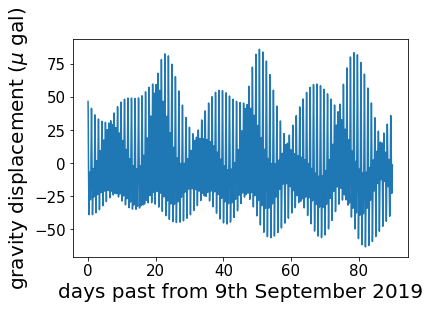

In [20]:
import matplotlib.pyplot as plt
figure,ax=plt.subplots(1,1)
plt.rcParams['figure.figsize']=[12,5]
ax.plot(((t-t.min())/(24*60*60)),gravityDisp*10**8)
ax.set_xlabel("days past from 9th September 2019",fontsize=20)
ax.set_ylabel(r"gravity displacement ($\mu$ gal)",fontsize=20)
ax.tick_params(labelsize=15)

In [21]:
f=open('gravity_disp.txt','+r').readlines()
time=np.zeros(len(f))
g_disp=np.zeros(len(f))
for i in range(len(f)):
    time[i]=np.float64(f[i].split(',')[0])
    g_disp[i]=np.float64(f[i].split(',')[1])    

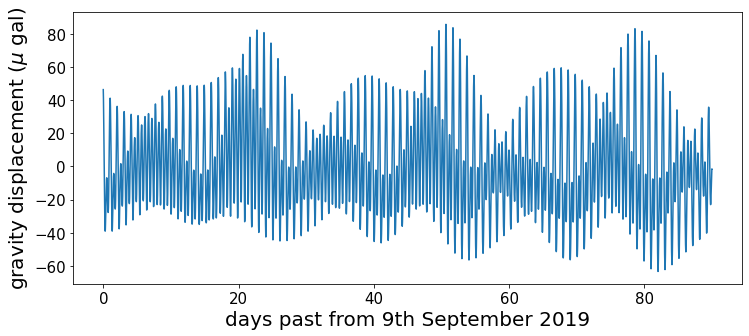

In [22]:
import matplotlib.pyplot as plt
figure,ax=plt.subplots(1,1)
plt.rcParams['figure.figsize']=[12,5]
ax.plot(time,g_disp)
ax.set_xlabel("days past from 9th September 2019",fontsize=20)
ax.set_ylabel(r"gravity displacement ($\mu$ gal)",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()
